# The Spark Foundation Internship

### By : Piyush Jain

## Task 2 - Prediction Unsupervised ML

Clustering

In this clustering task we will predict the optimum number of clusters and represent it visually.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
import sklearn.metrics as sm
import matplotlib.patches as mpatches

In [2]:
iris =datasets.load_iris()
X = pd.DataFrame(iris.data[:,:4], columns=["SLength","SWidth","PLength","PWidth"])
Y = pd.DataFrame(iris.target, columns=["target"])
frame = [X,Y]
data = pd.concat(frame,axis=1)
data.head()



,SLength,SWidth,PLength,PWidth,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SLength  150 non-null    float64
 1   SWidth   150 non-null    float64
 2   PLength  150 non-null    float64
 3   PWidth   150 non-null    float64
 4   target   150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [4]:
data.isnull().sum()

SLength    0
SWidth     0
PLength    0
PWidth     0
target     0
dtype: int64

In [5]:
data['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [6]:
data.describe()

,SLength,SWidth,PLength,PWidth,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot:>

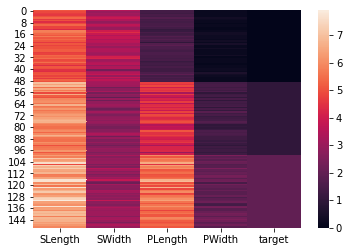

In [7]:
sns.heatmap(data)

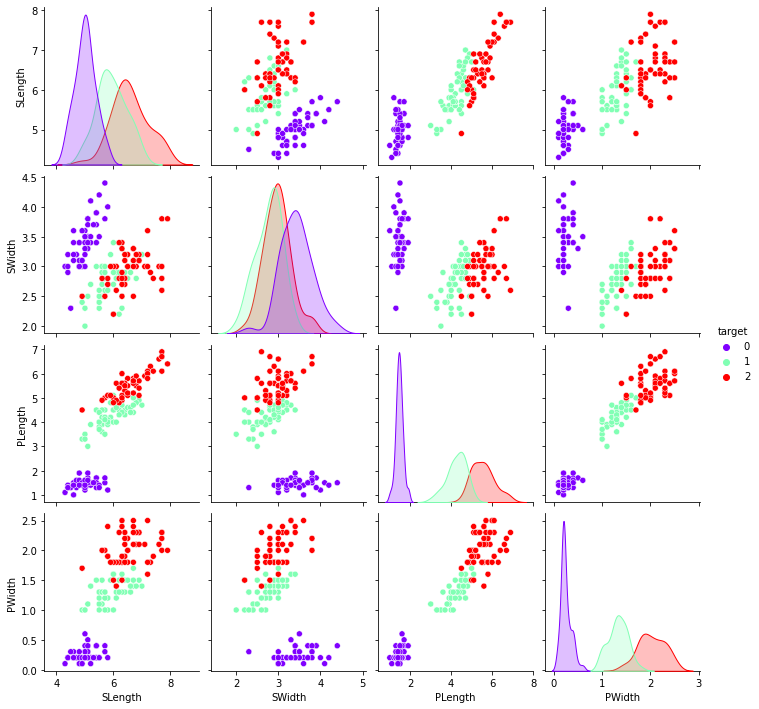

In [8]:
sns.pairplot(data,hue='target',palette='rainbow',kind='scatter')

## Finding the optimum number of clusters for k-means classification ##

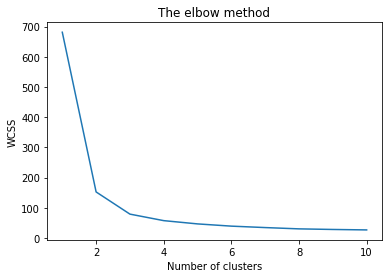

In [28]:

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [42]:
#Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
print (kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [45]:
print (kmeans.cluster_centers_)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [46]:
predictedY = np.choose(kmeans.labels_, [0, 1, 2])

In [47]:
sm.accuracy_score(predictedY, Y['target'])

0.8933333333333333

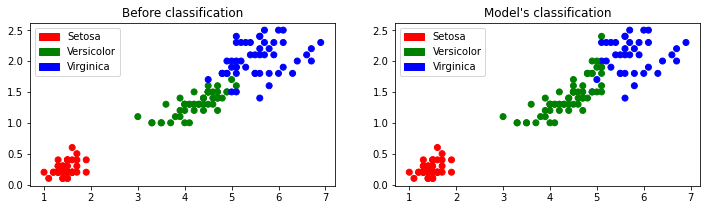

In [52]:
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(kmeans.labels_, [0, 1, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(X['PLength'], X['PWidth'], c=colors[Y['target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(X['PLength'], X['PWidth'], c=colors[predictedY])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

### Confusion Matrix ###

In [53]:
sm.confusion_matrix(predictedY, Y['target'])

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]], dtype=int64)